In [1]:
from numpy import cos,sin,pi,linspace,sqrt, empty,mgrid
from pylab  import plot,legend,show,imshow,gray,colorbar,figure,hot

primero creamos las funciones pa el metodeo de simsins 

In [2]:
def J(m,x):
    def f(T):
        return(cos(m*T-x*sin(T)))
    a=0
    b=pi
    N=1000
    h=(b-a)/N
    suma1=0
    suma2=0
    for k in range(1,N,2):
        suma1=suma1+f(a+(2*k-1)*h)
        suma2=suma2+f(a+2*k*h)
    I=(h/3)*(f(a)+f(b)+4*suma1+2*suma2)
    
    return(I/pi)

In [3]:
J0=[]
J1=[]
J2=[]
puntos_x=linspace(0,20,100)
for x in puntos_x:
    J0.append(J(0,x))
    J1.append(J(1,x))
    J2.append(J(2,x))

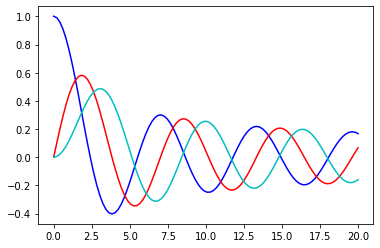

In [4]:
plot(puntos_x,J0,'b')
plot(puntos_x,J1,'r')
plot(puntos_x,J2,'c')
show()

Ahora creamos una matriz nxn (la cual se elegirá según la precisión requerida) y la llenamos con los valores de J1 que va desde -1 hasta 1 micrómetros 

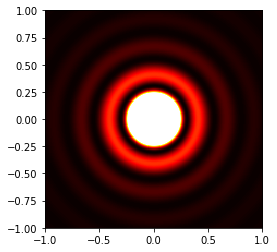

In [5]:
def I(r):
    if (r == 0):
        return 1/4

    Landa = 0.5
    kr = 2 * pi / Landa * r
    return (J(1,kr)/ kr)**2
pixeles=200
matriz=empty([pixeles,pixeles],float)
x_puntos = linspace(-1,1,pixeles)
for x in range(pixeles):
    for y in range(pixeles):
        distancia=sqrt(x_puntos[x]**2+x_puntos[y]**2)
        matriz[x,y]=I(distancia)
imshow(matriz, origin="lower", extent=[-1,1,-1,1], vmax=0.01)
hot()
show()